<a href="https://colab.research.google.com/github/uhsipra/MECE788_FinalProject/blob/main/MECE788_ECGDataset_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Context and EDA on ECG dataset

In [27]:
# Load required modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [28]:
# Loading training and test data for arrhythmia Dataset

ECG_Arrhythmia_train_df = pd.read_csv("ECG_Dataset_Kaggle/mitbih_train.csv", header = None)
ECG_Arrhythmia_test_df = pd.read_csv("ECG_Dataset_Kaggle/mitbih_test.csv", header = None)
ECG_PTB_Normal_df = pd.read_csv("ECG_Dataset_Kaggle/ptbdb_normal.csv", header = None)
ECG_PTB_Abnormal_df = pd.read_csv("ECG_Dataset_Kaggle/ptbdb_abnormal.csv", header = None)

Initial EDA on the ECG dataset

In [29]:
ECG_Arrhythmia_train_df.describe()
ECG_Arrhythmia_train_df.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            178, 179, 180, 181, 182, 183, 184, 185, 186, 187],
           dtype='int64', length=188)

In [30]:
ECG_PTB_Normal_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,...,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.0,4046.0
mean,0.979670,0.711486,0.311677,0.119575,0.088608,0.130843,0.159653,0.165608,0.168005,0.170783,...,0.001540,0.001332,0.001304,0.001220,0.000991,0.000894,0.000454,0.000474,0.0,0.0
std,0.029061,0.186376,0.183457,0.110457,0.075760,0.081104,0.090131,0.096094,0.102506,0.106190,...,0.018664,0.016234,0.016668,0.016658,0.015204,0.015311,0.010834,0.011202,0.0,0.0
min,0.782178,0.121784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,0.964468,0.580160,0.164112,0.028731,0.027735,0.070776,0.094656,0.098848,0.095594,0.094988,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,1.000000,0.726449,0.303266,0.092655,0.079476,0.121144,0.134312,0.142771,0.143002,0.145068,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,1.000000,0.863699,0.436091,0.187527,0.134861,0.183746,0.216203,0.217895,0.220572,0.223053,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
max,1.000000,1.000000,0.985955,0.910798,0.846591,0.770205,0.754524,0.749095,0.729192,0.700844,...,0.415879,0.361283,0.383522,0.407025,0.446281,0.483471,0.371502,0.376668,0.0,0.0


In [31]:
ECG_PTB_Abnormal_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,...,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.0,10506.0
mean,0.975468,0.725582,0.438306,0.290384,0.252897,0.249423,0.245668,0.247160,0.250203,0.252396,...,0.001055,0.001057,0.000744,0.000554,0.000533,0.000313,0.000070,0.000074,0.0,1.0
std,0.036354,0.199030,0.262699,0.270977,0.237004,0.211751,0.200159,0.194840,0.193160,0.192341,...,0.022312,0.022585,0.017557,0.013781,0.013553,0.010901,0.003754,0.004044,0.0,0.0
min,0.624227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
25%,0.957325,0.586602,0.236455,0.074064,0.088487,0.101422,0.097175,0.096331,0.098527,0.098041,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
50%,1.000000,0.745646,0.404297,0.212845,0.173046,0.180927,0.182782,0.191793,0.197088,0.200919,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
75%,1.000000,0.890043,0.620889,0.427811,0.343089,0.327582,0.328089,0.347707,0.359378,0.370106,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.985523,0.993213,0.997738,...,0.791899,0.773743,0.789804,0.628177,0.602033,0.644880,0.265025,0.279310,0.0,1.0


We are told that the ecg data for the arrhythmia dataset was sampled at a frequency of 125Hz. That means that each column except the target column is a snapshot taken in 8 millisecond intervals. We can convert the number of columns to their respective time snapshots but multiplying the column indec by 0.008 seconds and use that to create a plot of one heart beat cycle from a random sample

In [32]:
# We can determine the number of unique target labels for the arrhythmia dataset

ECG_Arrhythmia_train_df.iloc[:, 187].unique()

array([0., 1., 2., 3., 4.])

The PTB dataset has been split into two parts, one part containing normal patient ECG recordings and the other part containing abnormal patient ECG recordings, specifically recordings of patients with myocardial infarction. I am combining the two datasets into one for easier analysis.

In [33]:
ECG_PTB_combined_df = pd.concat([ECG_PTB_Normal_df, ECG_PTB_Abnormal_df])


In [34]:
ECG_PTB_combined_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,...,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.0,14552.000000
mean,0.976637,0.721663,0.403099,0.242893,0.207218,0.216453,0.221752,0.224486,0.227349,0.229704,...,0.001190,0.001133,0.000900,0.000739,0.000661,0.000475,0.000177,0.000185,0.0,0.721963
std,0.034532,0.195690,0.249794,0.249519,0.218097,0.192412,0.180740,0.176943,0.176674,0.176579,...,0.021361,0.021012,0.017316,0.014640,0.014033,0.012289,0.006545,0.006835,0.0,0.448047
min,0.624227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.959377,0.584589,0.212300,0.052269,0.061875,0.090487,0.096503,0.097095,0.097231,0.097144,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,1.000000,0.740148,0.371911,0.168148,0.136082,0.159451,0.167479,0.171541,0.177380,0.180337,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
75%,1.000000,0.881483,0.557785,0.336232,0.264104,0.264633,0.286484,0.302255,0.311664,0.325292,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.985523,0.993213,0.997738,...,0.791899,0.773743,0.789804,0.628177,0.602033,0.644880,0.371502,0.376668,0.0,1.000000


In [35]:
# Unique target labels for the PTB dataset
ECG_PTB_combined_df.iloc[:, 187].unique()

array([0., 1.])

In [36]:
# We can group by each label and take a random sample from the arrhythmia dataset to plot the differences between categories

In [37]:
target_label_samples = ECG_Arrhythmia_train_df.groupby(by = 187, group_keys = False).sample(1, random_state = 123)

In [38]:
target_label_samples

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
14967,1.000000,0.647702,0.039387,0.004376,0.102845,0.063457,0.067834,0.048140,0.045952,0.045952,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
73148,0.002865,0.171920,0.295129,0.412607,0.481375,0.595989,0.630372,0.704871,0.713467,0.736390,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
76429,0.600660,0.498350,0.333333,0.000000,0.006601,0.089109,0.108911,0.102310,0.122112,0.085809,...,0.29703,0.30033,0.313531,0.313531,0.333333,0.333333,0.356436,0.369637,0.0,2.0
80817,0.464135,0.122363,0.000000,0.130802,0.383966,0.565401,0.717300,0.793249,0.831224,0.835443,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,3.0
81355,0.643698,0.546219,0.431933,0.327731,0.196639,0.112605,0.047059,0.023529,0.026891,0.070588,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,4.0


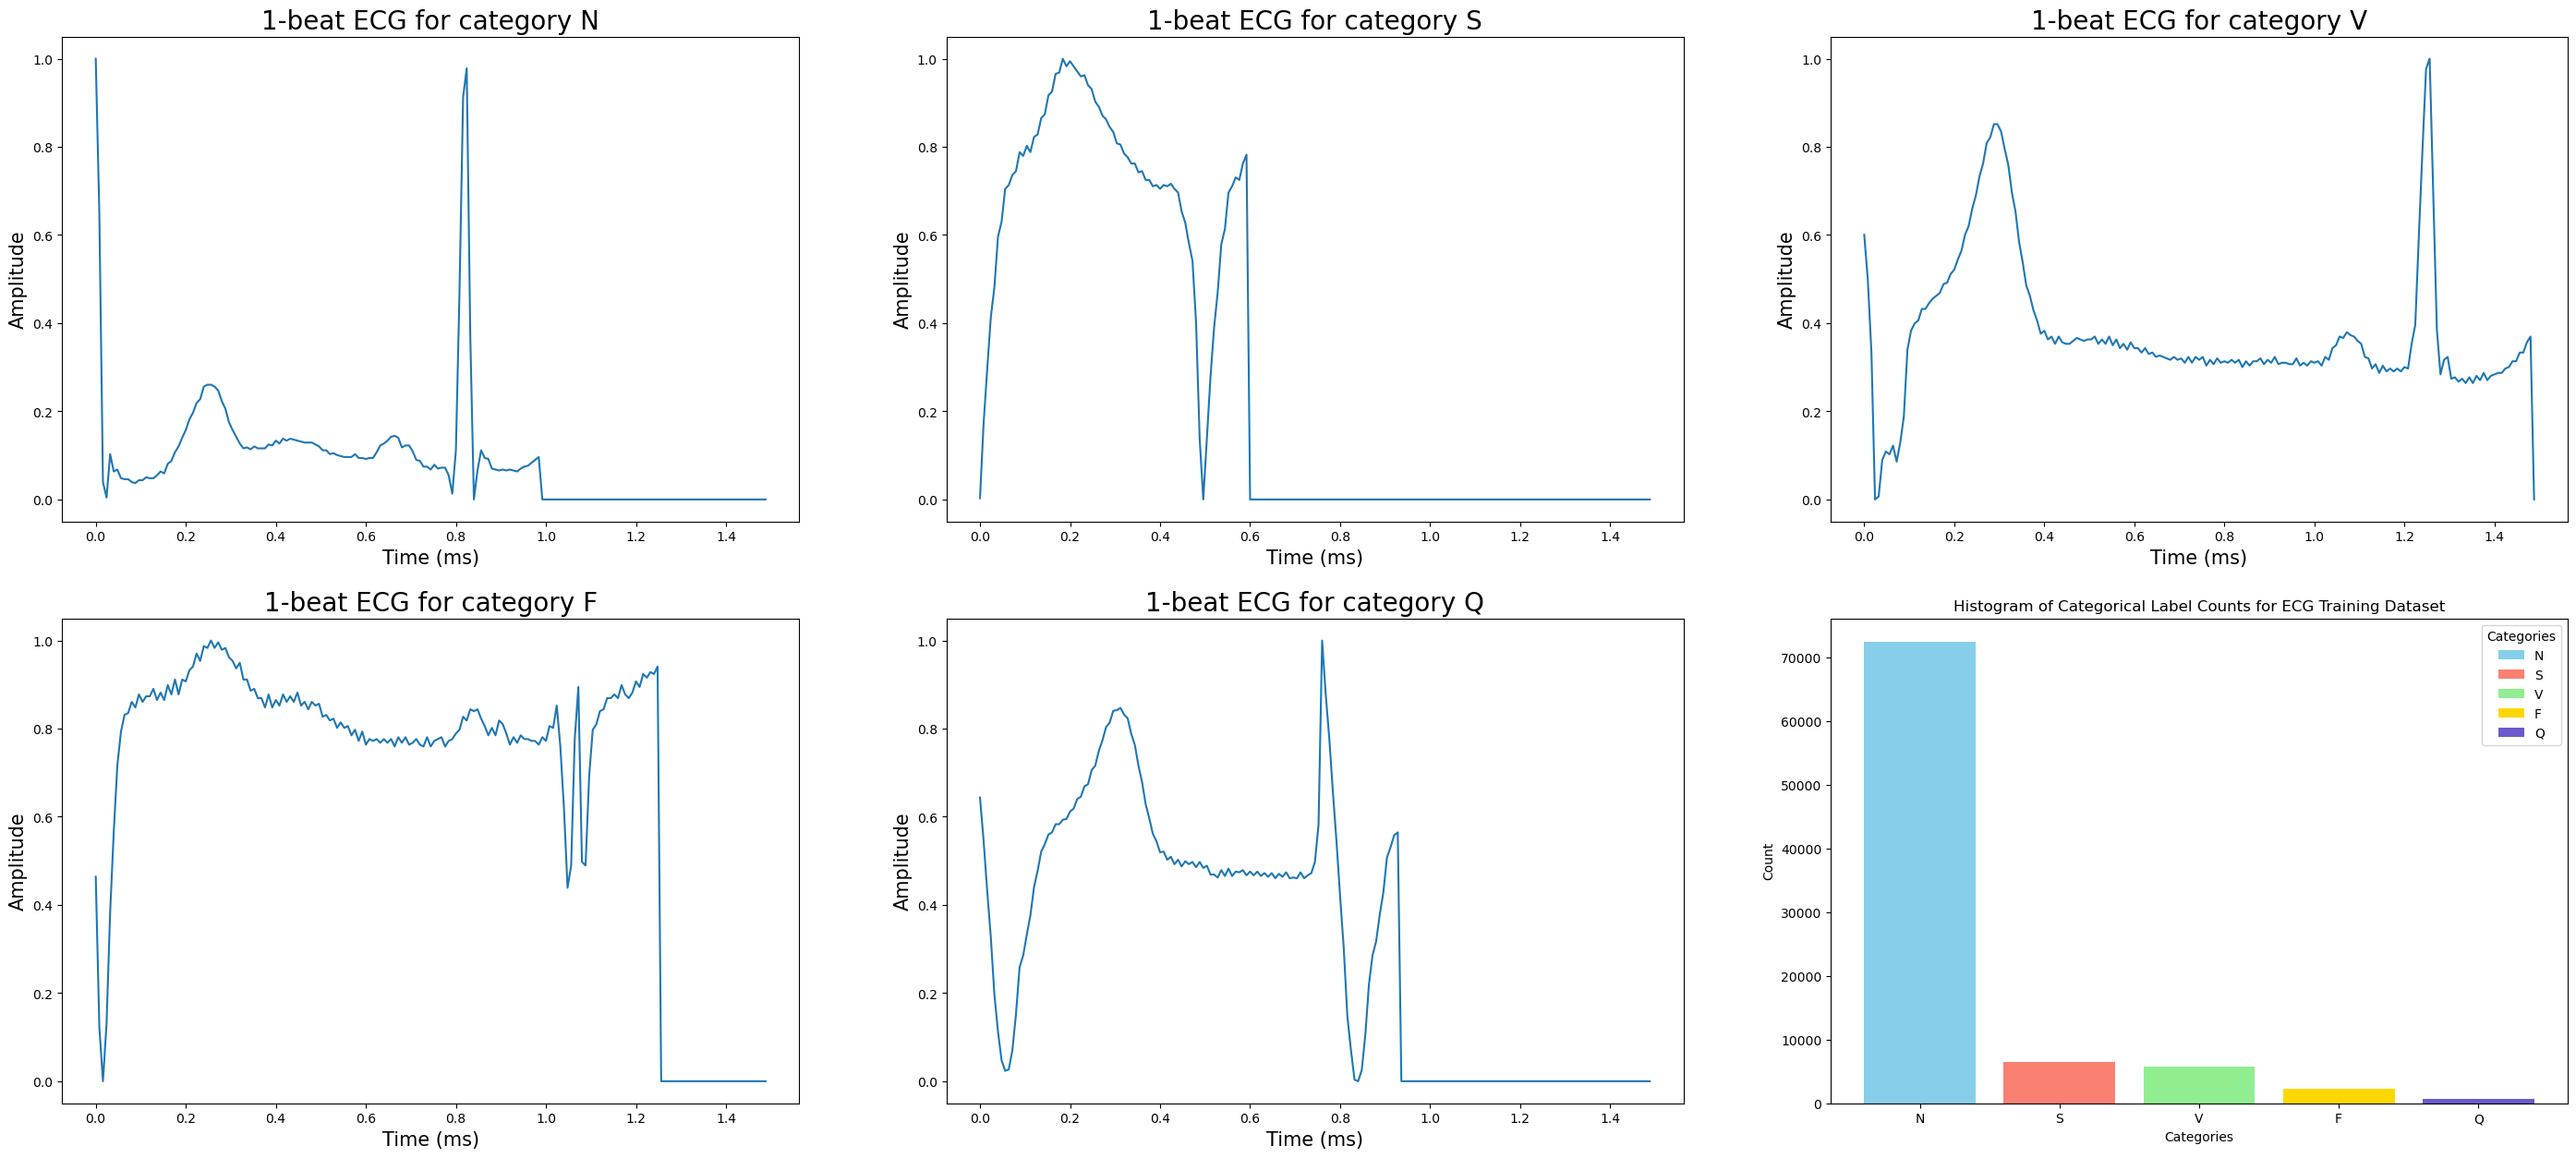

In [39]:
plt.figure(figsize=(35,15))

plt.subplot(2, 3, 1)

plt.plot(np.arange(0, 187)*8/1000, target_label_samples.iloc[0, :187])
plt.title("1-beat ECG for category N", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)

plt.subplot(2, 3, 2)

plt.plot(np.arange(0, 187)*8/1000, target_label_samples.iloc[1, :187])
plt.title("1-beat ECG for category S", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)

plt.subplot(2, 3, 3)

plt.plot(np.arange(0, 187)*8/1000, target_label_samples.iloc[2, :187])
plt.title("1-beat ECG for category V", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)

plt.subplot(2, 3, 4)

plt.plot(np.arange(0, 187)*8/1000, target_label_samples.iloc[3, :187])
plt.title("1-beat ECG for category F", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)

plt.subplot(2, 3, 5)

plt.plot(np.arange(0, 187)*8/1000, target_label_samples.iloc[4, :187])
plt.title("1-beat ECG for category Q", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)

plt.subplot(2, 3, 6)

plot = plt.bar(['N', 'S', 'V', 'F', 'Q'], ECG_Arrhythmia_train_df.iloc[:, 187].value_counts().values, color = ['skyblue', 'salmon', 'lightgreen', 'gold', 'slateblue'])
plt.title('Histogram of Categorical Label Counts for ECG Training Dataset')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.legend(plot, ['N', 'S', 'V', 'F', 'Q'], title='Categories', loc='upper right')

plt.show()

Text(0.5, 0, 'Time (ms)')

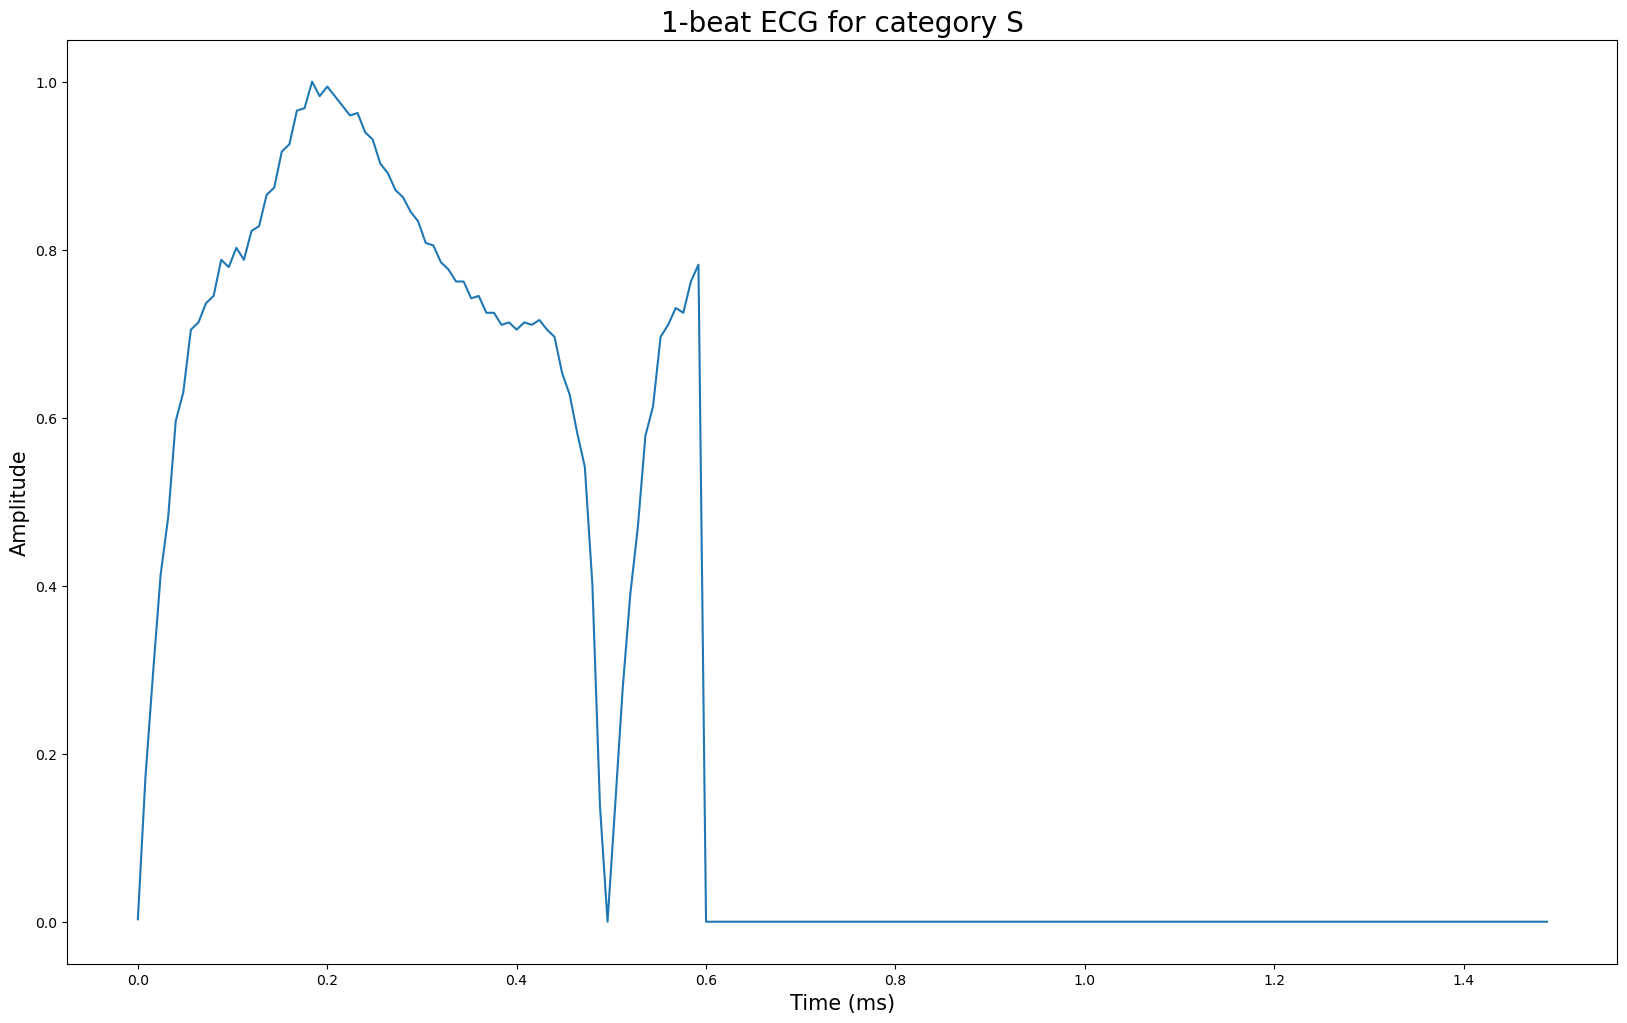

In [32]:
plt.figure(figsize=(20,12))
plt.plot(np.arange(0, 187)*8/1000, target_label_samples.iloc[1, :187])
plt.title("1-beat ECG for category S", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)

Text(0.5, 0, 'Time (ms)')

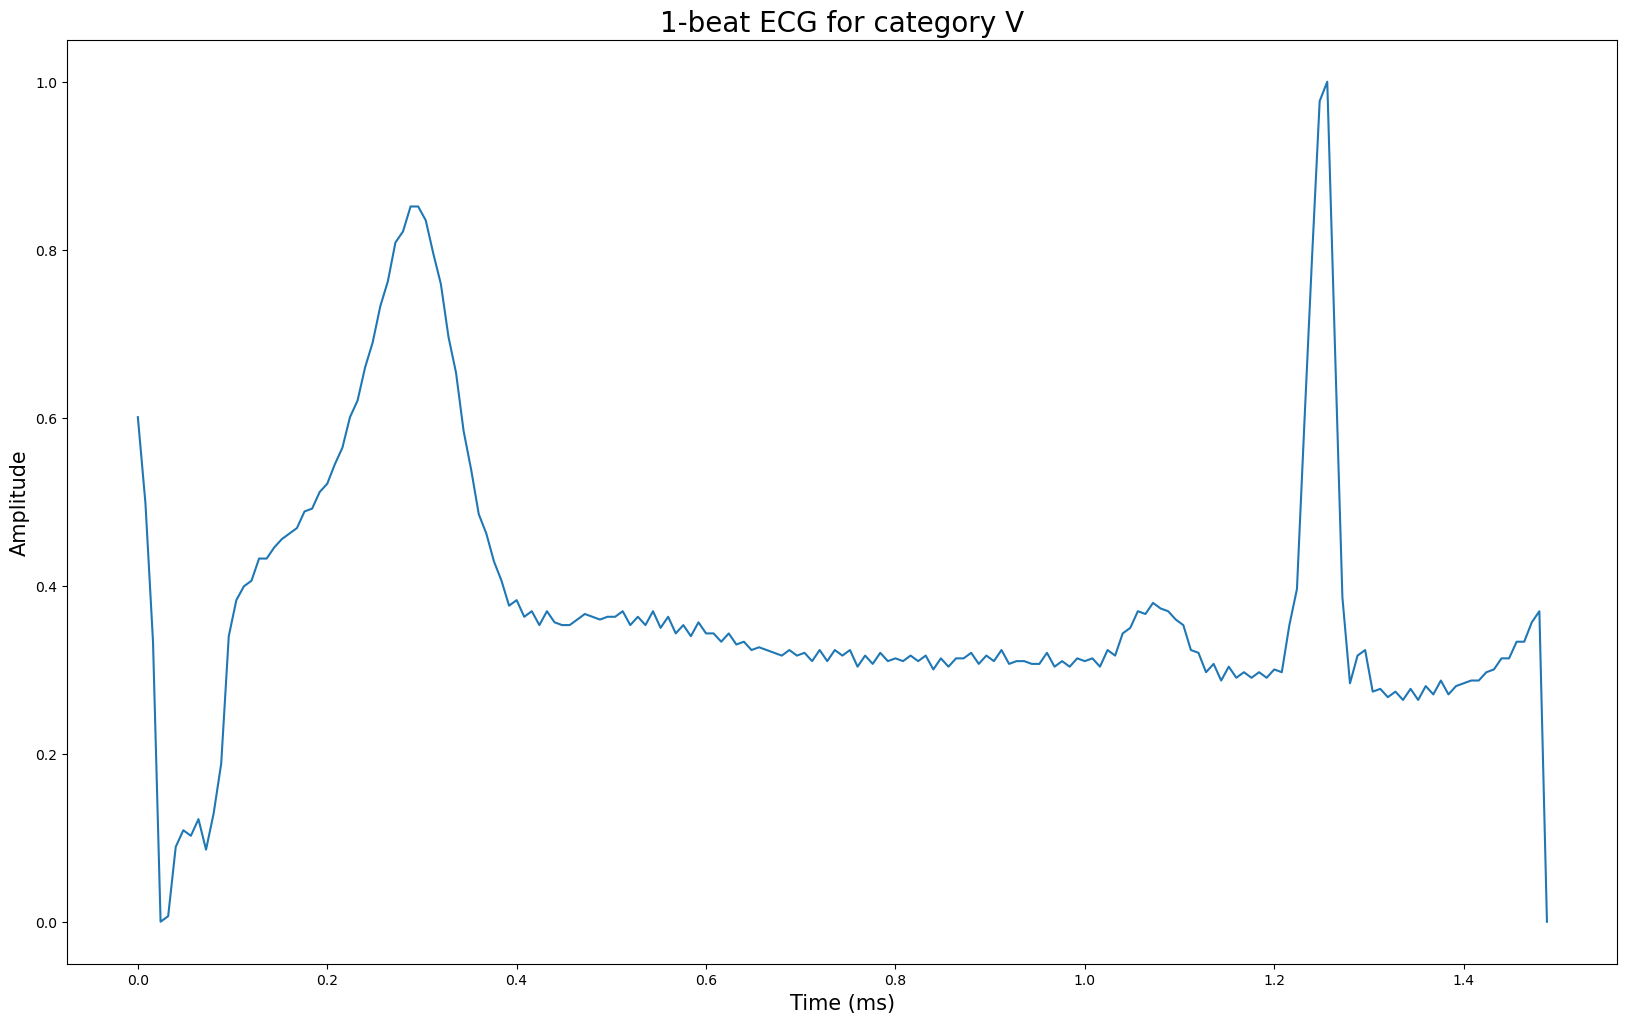

In [16]:
plt.figure(figsize=(20,12))
plt.plot(np.arange(0, 187)*8/1000, target_label_samples.iloc[2, :187])
plt.title("1-beat ECG for category V", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)

Text(0.5, 0, 'Time (ms)')

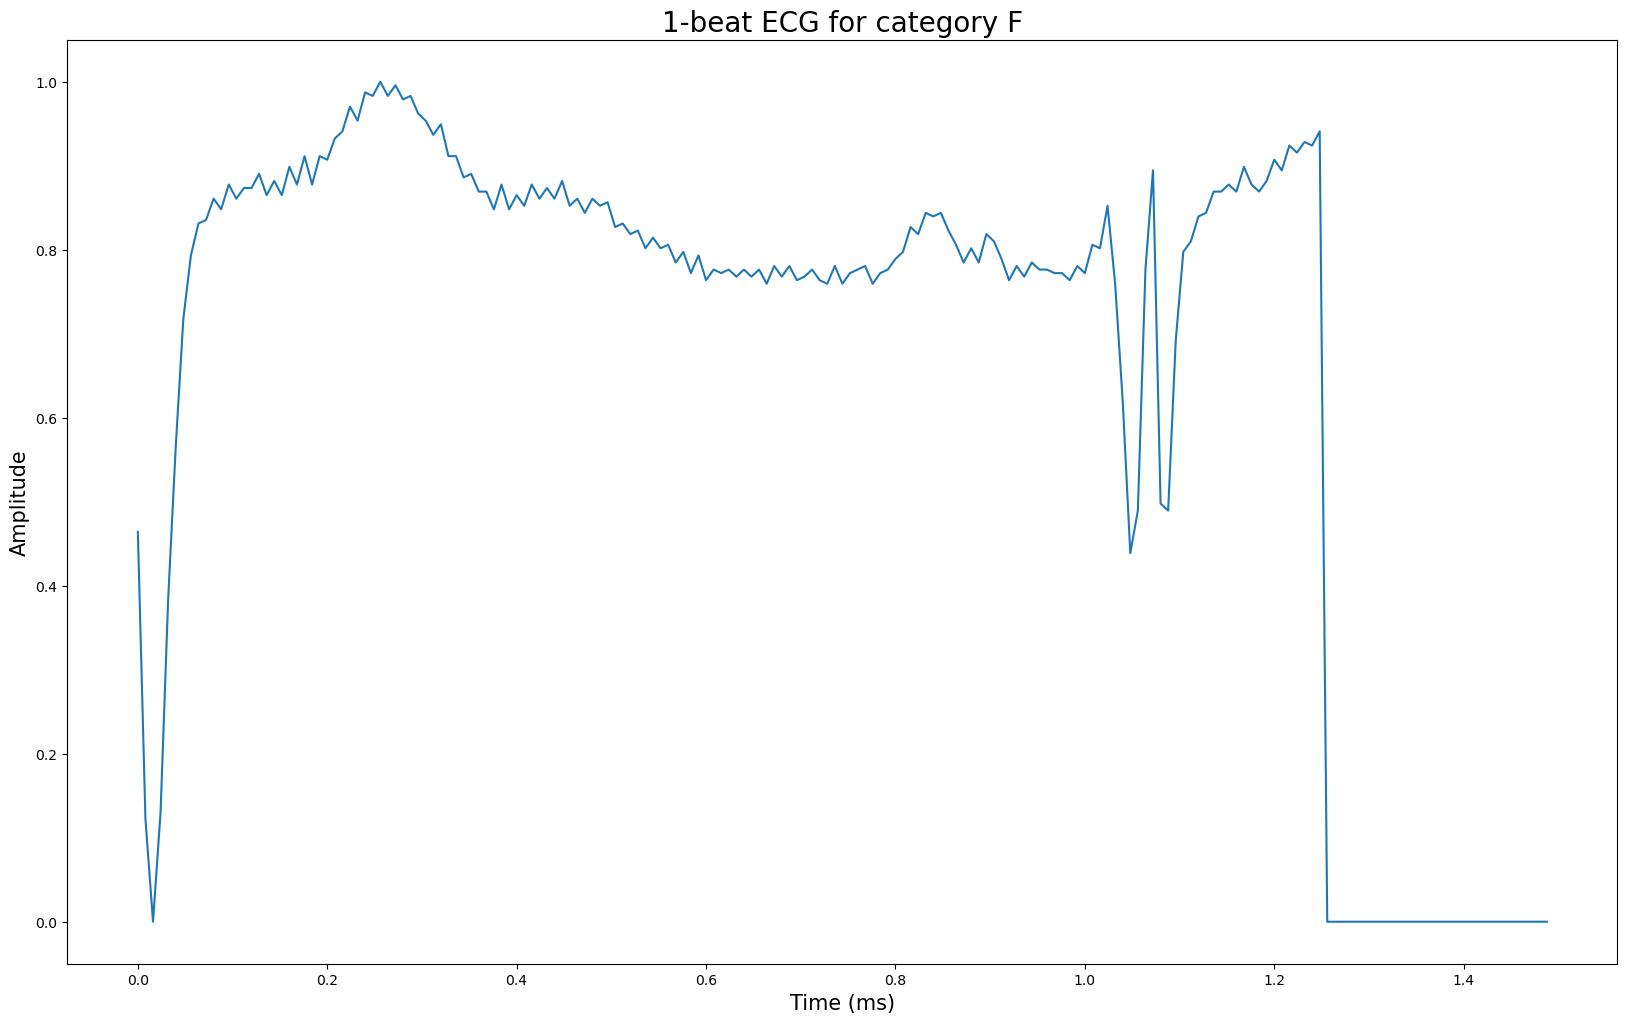

In [9]:
plt.figure(figsize=(20,12))
plt.plot(np.arange(0, 187)*8/1000, target_label_samples.iloc[3, :187])
plt.title("1-beat ECG for category F", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)

Text(0.5, 0, 'Time (ms)')

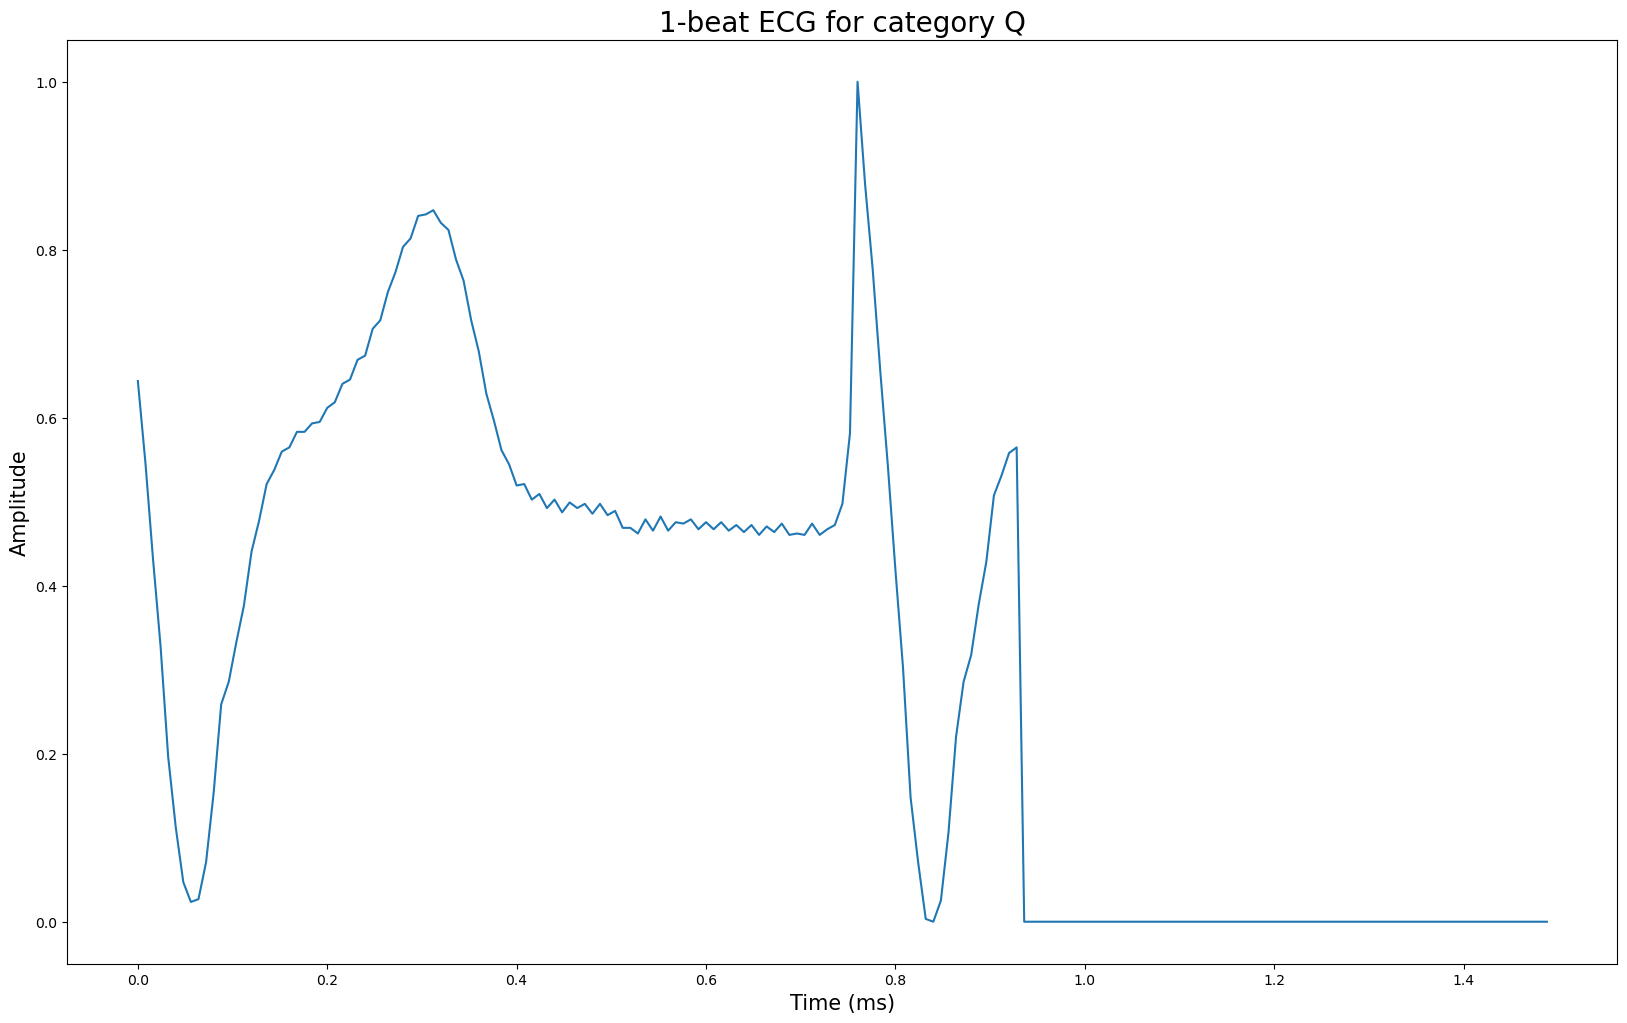

In [10]:
plt.figure(figsize=(20,12))
plt.plot(np.arange(0, 187)*8/1000, target_label_samples.iloc[4, :187])
plt.title("1-beat ECG for category Q", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)

Showing target label distribution in the training dataset

In [40]:
ECG_Arrhythmia_train_df.iloc[:, 187].value_counts()

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64

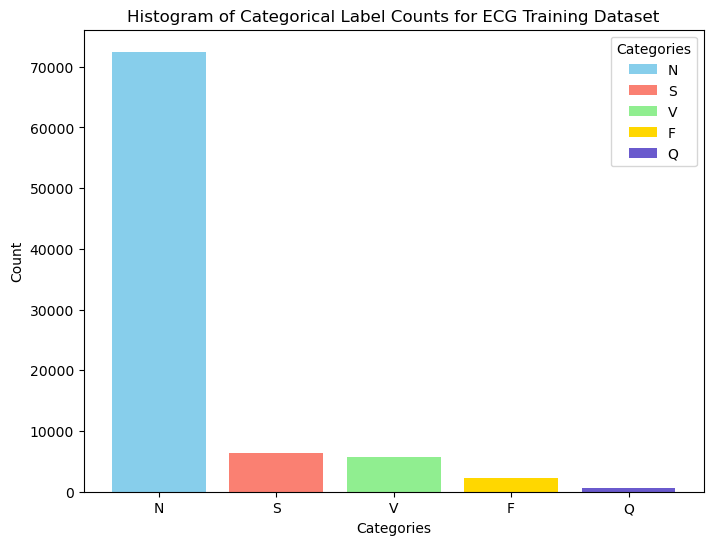

In [41]:
plt.figure(figsize = (8, 6))
plot = plt.bar(['N', 'S', 'V', 'F', 'Q'], ECG_Arrhythmia_train_df.iloc[:, 187].value_counts().values, color = ['skyblue', 'salmon', 'lightgreen', 'gold', 'slateblue'])
plt.title('Histogram of Categorical Label Counts for ECG Training Dataset')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.legend(plot, ['N', 'S', 'V', 'F', 'Q'], title='Categories', loc='upper right')
plt.show()

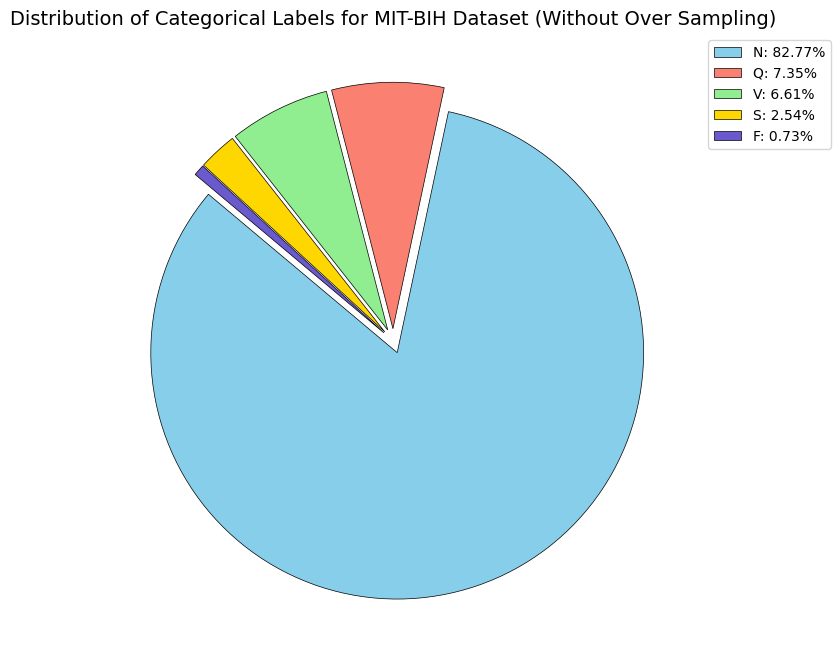

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

categories = ['N', 'Q', 'V', 'S', 'F']

# Count the occurrences of each class
class_counts = ECG_Arrhythmia_train_df.iloc[:, 187].value_counts()
total = sum(class_counts)
percentages = [counts / total * 100 for counts in class_counts]

# Define colors for each category
colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'slateblue']

# Create the pie chart
plt.figure(figsize=(8, 8))
explode = [0.05] * len(categories)  # Explode all slices
wedges, autotexts = plt.pie(class_counts, labels=None, startangle=140, pctdistance=0.85, colors=colors, textprops={'fontsize': 12}, explode=explode, wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'})

# Create legend with category names and percentages
legend_labels = [f'{category}: {percentage:.2f}%' for category, percentage in zip(categories, percentages)]
plt.legend(legend_labels, loc='upper left', fontsize=10, bbox_to_anchor=(1, 1))

# Set plot title
plt.title('Distribution of Categorical Labels for MIT-BIH Dataset (Without Over Sampling)', fontsize=14)

# Show the pie chart
plt.show()


We can clearly see there is a large imbalance within class label distribution. We will likely have to consider using some resampling technique to even out the class imbalance.